In [2]:
import pickle


with open('train.pkl', 'rb') as f:
    train = pickle.load(f)
with open('test.pkl', 'rb') as f:
    test = pickle.load(f)

In [3]:
train

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,crop_type,field_info,harvest_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std,px_num,tile_number,valid_px_proportion
0,0.854710,0.722707,0.000000,0.0,Corn,50787_2020,174.499496,0.0,0.0,0.047707,8.218419,1.205427,0.020446,0.007112,0.000889,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.225866,0.035450,0.0,0.0,0.000000e+00,1.758405e-05,0.000115,4.279285e-06,0.0,0.0,0.0,32053.666016,2460.160156,32060.0,1.0,0.030575
1,0.841044,0.346638,0.000883,0.0,Corn,50787_2020,211.255692,0.0,0.0,0.138608,8.395391,0.946437,0.019489,0.000075,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.210477,0.037663,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32900.351562,440.999817,252497.0,2.0,0.240800
2,0.117885,0.526473,0.243028,0.0,Corn,50787_2020,189.610092,0.0,0.0,0.014408,7.201348,2.070134,0.206995,0.006712,0.000403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.240254,0.047664,0.0,0.0,3.234229e-09,1.229007e-08,0.000137,0.000000e+00,0.0,0.0,0.0,32951.636719,320.363617,212309.0,3.0,0.202474
4,0.091827,0.699622,0.306191,0.0,Corn,50787_2020,174.854385,0.0,0.0,0.866611,7.031835,1.412911,0.121772,0.037984,0.026653,0.000958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001277,0.218355,0.059991,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,2.099477e-07,0.0,0.0,0.0,32930.121094,504.934814,59525.0,5.0,0.056767
5,0.078351,0.672237,0.000000,0.0,Corn,50787_2020,231.198898,0.0,0.0,0.504748,6.981388,1.877668,0.135963,0.000175,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000058,0.222510,0.054354,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32905.542969,297.537506,163011.0,6.0,0.155459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.000000,0.080196,0.024455,0.0,Corn,72_2020,236.343155,0.0,0.0,0.000000,0.615020,5.138170,3.058913,0.593980,0.087790,0.006127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.357936,0.073985,0.0,0.0,3.135487e-09,7.721137e-08,0.000018,1.195773e-04,0.0,0.0,0.0,37169.433594,762.507446,350392.0,8.0,0.334160
8,0.000000,0.080293,0.024159,0.0,Corn,72_2020,232.948776,0.0,0.0,0.000304,1.364813,6.101490,1.839556,0.166638,0.026453,0.000747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.324955,0.060988,0.0,0.0,4.158571e-08,4.297190e-07,0.000014,1.225625e-04,0.0,0.0,0.0,37178.828125,994.355103,1030338.0,9.0,0.982607
9,0.001870,0.111908,0.027459,0.0,Corn,72_2020,233.594147,0.0,0.0,0.002601,1.417204,6.645646,1.397796,0.035560,0.001173,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.315096,0.050622,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.297594e-04,0.0,0.0,0.0,37316.613281,528.748291,1044561.0,10.0,0.996171
10,0.320803,0.030918,0.000000,0.0,Corn,72_2020,231.707611,0.0,0.0,0.000000,2.256577,6.453205,0.785856,0.004307,0.000055,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.299112,0.045448,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.291121e-04,0.0,0.0,0.0,37327.144531,543.739136,1043293.0,11.0,0.994962


In [15]:
X_train = train.drop(labels=['harvest_mean', 'crop_type', 'field_info', 'px_num', 'tile_number', 'valid_px_proportion'], axis=1)

In [16]:
X_train

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
0,0.854710,0.722707,0.000000,0.0,0.0,0.0,0.047707,8.218419,1.205427,0.020446,0.007112,0.000889,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.225866,0.035450,0.0,0.0,0.000000e+00,1.758405e-05,0.000115,4.279285e-06,0.0,0.0,0.0,32053.666016,2460.160156
1,0.841044,0.346638,0.000883,0.0,0.0,0.0,0.138608,8.395391,0.946437,0.019489,0.000075,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.210477,0.037663,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32900.351562,440.999817
2,0.117885,0.526473,0.243028,0.0,0.0,0.0,0.014408,7.201348,2.070134,0.206995,0.006712,0.000403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.240254,0.047664,0.0,0.0,3.234229e-09,1.229007e-08,0.000137,0.000000e+00,0.0,0.0,0.0,32951.636719,320.363617
4,0.091827,0.699622,0.306191,0.0,0.0,0.0,0.866611,7.031835,1.412911,0.121772,0.037984,0.026653,0.000958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001277,0.218355,0.059991,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,2.099477e-07,0.0,0.0,0.0,32930.121094,504.934814
5,0.078351,0.672237,0.000000,0.0,0.0,0.0,0.504748,6.981388,1.877668,0.135963,0.000175,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000058,0.222510,0.054354,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32905.542969,297.537506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.000000,0.080196,0.024455,0.0,0.0,0.0,0.000000,0.615020,5.138170,3.058913,0.593980,0.087790,0.006127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.357936,0.073985,0.0,0.0,3.135487e-09,7.721137e-08,0.000018,1.195773e-04,0.0,0.0,0.0,37169.433594,762.507446
8,0.000000,0.080293,0.024159,0.0,0.0,0.0,0.000304,1.364813,6.101490,1.839556,0.166638,0.026453,0.000747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.324955,0.060988,0.0,0.0,4.158571e-08,4.297190e-07,0.000014,1.225625e-04,0.0,0.0,0.0,37178.828125,994.355103
9,0.001870,0.111908,0.027459,0.0,0.0,0.0,0.002601,1.417204,6.645646,1.397796,0.035560,0.001173,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.315096,0.050622,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.297594e-04,0.0,0.0,0.0,37316.613281,528.748291
10,0.320803,0.030918,0.000000,0.0,0.0,0.0,0.000000,2.256577,6.453205,0.785856,0.004307,0.000055,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.299112,0.045448,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.291121e-04,0.0,0.0,0.0,37327.144531,543.739136


In [17]:
test

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,crop_type,field_info,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std,px_num,tile_number,valid_px_proportion
12,0.386093,0.480049,0.139860,0.0,Corn,72_2020,0.0,0.0,0.000218,4.094136,4.336040,1.027408,0.041736,0.000435,0.000027,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285632,0.060784,0.0,0.0,1.650804e-08,1.226312e-07,0.000014,1.231634e-04,0.0,0.0,0.0,37159.269531,771.734314,349400.0,13.0,0.333214
14,0.000000,0.030705,0.000000,0.0,Corn,72_2020,0.0,0.0,0.000029,1.772755,6.051907,1.449822,0.149401,0.062607,0.013480,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317621,0.065575,0.0,0.0,0.000000e+00,0.000000e+00,0.000007,1.307610e-04,0.0,0.0,0.0,37331.328125,557.529236,329127.0,15.0,0.313880
15,0.000000,0.081617,0.003744,0.0,Corn,72_2020,0.0,0.0,0.000019,2.831839,5.745485,0.908785,0.013641,0.000232,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296440,0.050604,0.0,0.0,6.479168e-08,2.519379e-07,0.000013,1.238269e-04,0.0,0.0,0.0,37258.417969,1053.952393,1025877.0,16.0,0.978353
16,0.004276,0.074157,0.006847,0.0,Corn,72_2020,0.0,0.0,0.000055,2.703443,6.040906,0.752670,0.002926,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295317,0.047511,0.0,0.0,0.000000e+00,0.000000e+00,0.000005,1.320971e-04,0.0,0.0,0.0,37469.238281,538.353333,1045521.0,17.0,0.997087
17,0.333352,0.021147,0.000000,0.0,Corn,72_2020,0.0,0.0,0.000000,1.854301,6.417746,1.214192,0.013634,0.000127,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307088,0.049356,0.0,0.0,0.000000e+00,0.000000e+00,0.000004,1.333414e-04,0.0,0.0,0.0,37486.871094,526.481750,1045860.0,18.0,0.997410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.050837,0.254421,0.000000,0.0,Corn,50774_2020,0.0,0.0,0.312279,6.247535,1.926179,0.907644,0.091525,0.008744,0.005572,0.000522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247662,0.080175,0.0,0.0,0.000000e+00,2.517783e-06,0.000131,3.752764e-06,0.0,0.0,0.0,33436.882812,1333.324341,491064.0,85.0,0.468315
85,0.000000,0.075443,0.000000,0.0,Corn,50774_2020,0.0,0.0,0.010977,6.157296,2.209677,1.034857,0.083445,0.002700,0.000835,0.000213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262212,0.073097,0.0,0.0,1.566257e-08,2.131136e-08,0.000137,5.083916e-08,0.0,0.0,0.0,33500.664062,300.470154,534855.0,86.0,0.510077
86,0.020725,0.234638,0.000000,0.0,Corn,50774_2020,0.0,0.0,0.296746,5.891145,2.395780,0.857880,0.055426,0.002252,0.000669,0.000101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252853,0.074429,0.0,0.0,2.463513e-08,7.320154e-07,0.000135,1.233516e-06,0.0,0.0,0.0,33506.078125,796.813721,468267.0,87.0,0.446574
87,0.882371,0.343513,0.018653,0.0,Corn,50774_2020,0.0,0.0,2.893169,5.241519,1.246274,0.117089,0.001933,0.000016,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195359,0.058829,0.0,0.0,1.475034e-07,2.904260e-07,0.000136,4.603756e-07,0.0,0.0,0.0,33489.847656,729.197510,599588.0,88.0,0.571812


In [18]:
y_train = train['harvest_mean']

In [19]:
X_test = test.drop(labels=['crop_type', 'field_info', 'px_num', 'tile_number', 'valid_px_proportion'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [21]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = regr.predict(X_val)

y_pred

array([182.01173253, 202.86333011, 222.8189028 , ..., 247.88179451,
       182.61908797, 247.49755175])

In [23]:
y_val

49     181.091248
36     219.389832
99     204.010254
134    272.292969
163    227.191727
          ...    
32     145.496964
46     240.624283
126    183.397308
3      242.396194
38     266.401062
Name: harvest_mean, Length: 2108, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(y_pred, y_val) ** 0.5

32.822765877893055

In [27]:
import numpy as np

np.mean(y_val)

224.78942954698596

In [28]:
from sklearn.linear_model import Ridge

In [29]:
min_loss = np.inf
alp = 0
for i in range(1000):
    regr = Ridge(alpha=i/10)
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_val)

    loss = mean_squared_error(y_pred, y_val) ** 0.5
    if loss < min_loss:
        min_loss = loss
        alp = i / 10
        print(f"Minimum loss is {loss} for alpha={i/10}")

Minimum loss is 18309.168910965556 for alpha=0.0
Minimum loss is 32.80531728119471 for alpha=0.1


In [30]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)

X_train_sq = poly.fit_transform(X_train)

In [31]:
regr = Ridge(alpha=alp)

regr.fit(X_train_sq, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.37692e-22): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
X_val_sq = poly.fit_transform(X_val)

In [34]:
y_pred = regr.predict(X_val_sq)

loss = mean_squared_error(y_pred, y_val) ** 0.5
print(loss)

31.092676899685937


In [ ]:
min_loss = np.inf
alp = 0
for i in range(1000):
    regr = Ridge(alpha=i/10)
    regr.fit(X_train_sq, y_train)

    y_pred = regr.predict(X_val_sq)

    loss = mean_squared_error(y_pred, y_val) ** 0.5
    if loss < min_loss:
        min_loss = loss
        alp = i / 10
        print(f"Minimum loss is {loss} for alpha={i/10}")

In [36]:
print(f"The minimum loss is {min_loss}, when alpha={alp}")

The minimum loss is 31.092676899685937, when alpha=0.1


In [37]:
X_train

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
6,0.155495,0.001077,0.778099,0.000000,0.0,0.0,0.000000,2.047097,5.923983,1.371699,0.104577,0.028018,0.017730,0.006895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.308662,0.063204,0.0,0.0,1.922320e-07,9.809371e-07,1.353946e-04,7.633906e-07,0.0,0.0,0.0,34882.050781,2037.810913
30,0.000000,0.735717,0.000000,0.000000,0.0,0.0,0.175645,0.502396,7.383866,1.265354,0.122047,0.029705,0.019050,0.001937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.323092,0.061267,0.0,0.0,5.600973e-08,5.339595e-06,1.319356e-04,0.000000e+00,0.0,0.0,0.0,32054.892578,2098.776123
12,0.000000,0.051099,0.243186,0.000000,0.0,0.0,0.000000,0.555369,6.920064,1.963617,0.060680,0.000269,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.330837,0.048826,0.0,0.0,2.303068e-07,2.480330e-07,2.331645e-05,1.135364e-04,0.0,0.0,0.0,36874.164062,1099.001221
130,0.804951,0.041768,0.028016,0.000000,0.0,0.0,0.000400,2.912750,3.184180,1.967186,1.266206,0.166876,0.002305,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.341288,0.106495,0.0,0.0,7.428674e-08,1.262875e-06,1.197729e-04,1.622112e-05,0.0,0.0,0.0,35572.789062,1359.144775
104,0.034211,0.257125,0.000000,0.000000,0.0,0.0,0.000000,2.494023,3.575166,1.545967,1.236920,0.612670,0.035254,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.356495,0.119517,0.0,0.0,0.000000e+00,0.000000e+00,1.324834e-04,4.847781e-06,0.0,0.0,0.0,35498.125000,1192.024658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.015936,0.953996,0.000000,0.000000,0.0,0.0,0.147054,8.674039,0.676984,0.001904,0.000009,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.209571,0.031880,0.0,0.0,0.000000e+00,9.788454e-08,7.048500e-07,1.365285e-04,0.0,0.0,0.0,38007.125000,519.667236
38,0.000000,0.276730,0.000000,0.577096,0.0,0.0,0.000041,3.323312,4.738012,1.341666,0.096823,0.000145,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.297740,0.060531,0.0,0.0,7.632121e-09,2.515607e-07,1.370720e-04,0.000000e+00,0.0,0.0,0.0,34320.757812,419.724060
26,0.000000,0.000000,0.041921,0.000000,0.0,0.0,0.174643,4.122525,3.450461,1.558375,0.191471,0.002343,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000182,0.288526,0.081377,0.0,0.0,0.000000e+00,0.000000e+00,1.373312e-04,0.000000e+00,0.0,0.0,0.0,34663.730469,132.395386
81,0.146832,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.109555,5.897763,3.440157,0.052525,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.353713,0.046165,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.373312e-04,0.0,0.0,0.0,37497.875000,145.629562


In [38]:
X_train.describe()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8.428000e+03,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8.428000e+03,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8428.0,8.428000e+03,8.428000e+03,8428.000000,8.428000e+03,8428.0,8428.0,8428.0,8428.000000,8428.000000
mean,0.203695,0.221604,0.133541,0.033724,0.0,1.037656e-07,0.345798,3.658154,3.653430,1.158834,0.408853,0.178434,0.077966,0.014281,0.001139,9.399235e-07,0.000003,0.000004,0.000004,0.000003,0.000003,0.000014,0.003079,0.300160,0.064950,0.0,0.0,1.156109e-07,1.124116e-06,0.000098,3.762264e-05,0.0,0.0,0.0,35143.331296,1016.605320
std,0.331011,0.346511,0.316074,0.138927,0.0,9.526113e-06,1.241748,2.629650,2.017656,1.209908,0.671279,0.569965,0.488096,0.122691,0.055461,8.628886e-05,0.000280,0.000367,0.000323,0.000229,0.000196,0.000301,0.057763,0.080886,0.029678,0.0,0.0,9.028765e-07,3.941175e-06,0.000050,5.038428e-05,0.0,0.0,0.0,1734.950829,801.278450
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067838,0.012903,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,25389.802734,0.000000
25%,0.000000,0.000366,0.000000,0.000000,0.0,0.000000e+00,0.000009,1.332794,2.271305,0.121244,0.000939,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251653,0.042289,0.0,0.0,0.000000e+00,0.000000e+00,0.000064,2.977399e-08,0.0,0.0,0.0,34074.762695,414.603539
50%,0.033034,0.061934,0.000000,0.000000,0.0,0.000000e+00,0.000933,3.423767,3.630797,0.871996,0.046695,0.001725,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290594,0.058686,0.0,0.0,0.000000e+00,8.622477e-08,0.000127,8.003958e-06,0.0,0.0,0.0,35489.597656,782.762726
75%,0.292095,0.292690,0.086759,0.000000,0.0,0.000000e+00,0.050701,5.826804,5.081082,1.856695,0.555626,0.053995,0.003637,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336184,0.083656,0.0,0.0,5.878917e-08,8.988135e-07,0.000136,7.171076e-05,0.0,0.0,0.0,36260.295898,1450.651489
max,3.356656,2.798137,3.317399,2.201266,0.0,8.745366e-04,9.500000,9.500000,9.323266,9.422462,7.995107,8.112792,7.618436,5.700000,4.281520,7.921675e-03,0.025677,0.033680,0.029643,0.021009,0.017836,0.017133,2.769782,0.786439,0.214162,0.0,0.0,4.665107e-05,1.373312e-04,0.000137,1.373312e-04,0.0,0.0,0.0,39230.460938,7586.876465


In [ ]:
X_train = X_train.drop(['ndvi_hist_0', 'planter_hist_0', 'planter_hist_1', 'planter_hist_6', 'planter_hist_7', 'planter_hist_8'], axis=1)
X_val = X_val.drop(['ndvi_hist_0', 'planter_hist_0', 'planter_hist_1', 'planter_hist_6', 'planter_hist_7', 'planter_hist_8'], axis=1)

In [42]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)

loss = mean_squared_error(y_pred, y_val) ** 0.5

print(loss)

32.82276587783807


In [49]:
import seaborn

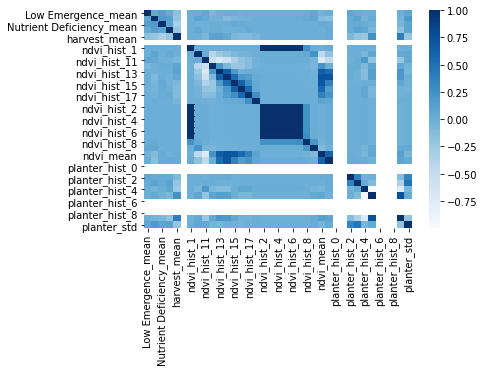

In [ ]:
seaborn.heatmap(X_train.corr(),cmap='Blues',annot=False)

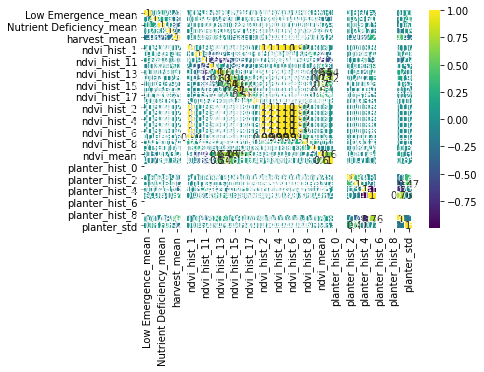

In [ ]:
seaborn.heatmap(X_train.corr(),cmap='viridis',annot=True)

In [43]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
Low Emergence_mean,1.000000,0.050262,0.113383,0.024292,-0.005221,-0.001512,0.058151,-0.073370,0.000871,0.011245,-0.002819,-0.022156,-0.011941,-0.012010,-0.005221,-0.005221,-0.005211,-0.005322,-0.005459,-0.006883,0.015918,0.051059,-0.031997,0.000233,0.085103,0.022651,-0.009937,0.006594,0.006224,0.083872
New yield risk_mean,0.050262,1.000000,0.173650,0.126791,0.001406,0.090517,0.034165,-0.025539,-0.015039,-0.095895,-0.075039,-0.053326,-0.029301,0.003304,0.001406,0.001406,0.001397,0.001479,0.001486,0.004328,0.036140,0.070130,-0.104131,-0.133158,0.021974,0.095912,-0.047531,0.039411,-0.049471,0.173304
Nutrient Deficiency_mean,0.113383,0.173650,1.000000,0.077344,-0.001122,-0.016501,-0.015614,0.018082,-0.000429,-0.003812,0.033898,0.018331,0.003259,0.000250,-0.001122,-0.001122,-0.001078,-0.001171,-0.001215,-0.000550,-0.001418,-0.009259,0.021733,0.009674,0.013845,0.031864,0.005587,-0.008301,-0.061986,0.074642
Replant Risk_mean,0.024292,0.126791,0.077344,1.000000,-0.002644,0.037431,-0.023897,0.013400,0.008642,-0.018704,-0.014951,-0.006783,0.024114,-0.001529,-0.002644,-0.002644,-0.002652,-0.002687,-0.002868,-0.003611,-0.004232,0.006699,-0.011577,0.034412,0.018643,0.094689,0.075332,-0.082718,-0.168230,0.091339
ndvi_hist_1,-0.005221,0.001406,-0.001122,-0.002644,1.000000,0.006359,0.009377,-0.010020,-0.006204,-0.005547,-0.003373,-0.001736,-0.001268,-0.000224,1.000000,1.000000,0.999995,0.999914,0.999111,0.988813,0.585274,0.002854,-0.011552,0.017664,-0.001230,-0.000831,0.008202,-0.008076,-0.014053,-0.004663
ndvi_hist_10,-0.001512,0.090517,-0.016501,0.037431,0.006359,1.000000,0.005819,-0.403871,-0.230247,-0.156068,-0.084368,-0.043284,-0.029627,-0.005674,0.006359,0.006359,0.006399,0.006320,0.006317,0.012107,0.087764,0.247419,-0.440312,-0.178420,-0.003935,-0.008305,-0.075704,0.076067,0.052663,0.060117
ndvi_hist_11,0.058151,0.034165,-0.015614,-0.023897,0.009377,0.005819,1.000000,-0.548559,-0.691760,-0.558375,-0.352099,-0.198819,-0.130802,-0.027478,0.009377,0.009377,0.009380,0.009457,0.009653,0.008981,-0.011769,-0.051790,-0.715750,-0.475873,-0.018121,0.008228,0.184552,-0.184001,-0.216054,0.045519
ndvi_hist_12,-0.073370,-0.025539,0.018082,0.013400,-0.010020,-0.403871,-0.548559,1.000000,0.193254,-0.089830,-0.218617,-0.206608,-0.126472,-0.031726,-0.010020,-0.010020,-0.010046,-0.009985,-0.009967,-0.012063,-0.036649,-0.076145,0.222011,0.018686,0.012817,-0.001314,-0.094590,0.094017,0.058682,-0.053590
ndvi_hist_13,0.000871,-0.015039,-0.000429,0.008642,-0.006204,-0.230247,-0.691760,0.193254,1.000000,0.625884,0.176476,-0.027664,-0.000092,0.000083,-0.006204,-0.006204,-0.006211,-0.006314,-0.006562,-0.007763,-0.013815,-0.035298,0.632824,0.525504,0.011976,-0.021611,-0.129058,0.129926,0.205189,-0.046943
ndvi_hist_14,0.011245,-0.095895,-0.003812,-0.018704,-0.005547,-0.156068,-0.558375,-0.089830,0.625884,1.000000,0.538845,0.185960,0.139822,0.025303,-0.005547,-0.005547,-0.005542,-0.005630,-0.005804,-0.006677,-0.013643,-0.027751,0.727115,0.714286,0.028653,-0.019416,-0.122415,0.122844,0.180890,-0.001179


In [44]:
X_train = X_train.drop(['ndvi_hist_3', 'ndvi_hist_4', 'ndvi_hist_5', 'ndvi_hist_6', 'ndvi_hist_7'], axis=1)
X_val = X_val.drop(['ndvi_hist_3', 'ndvi_hist_4', 'ndvi_hist_5', 'ndvi_hist_6', 'ndvi_hist_7'], axis=1)

In [46]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
Low Emergence_mean,1.000000,0.050262,0.113383,0.024292,-0.005221,-0.001512,0.058151,-0.073370,0.000871,0.011245,-0.002819,-0.022156,-0.011941,-0.012010,-0.005221,0.015918,0.051059,-0.031997,0.000233,0.085103,0.022651,-0.009937,0.006594,0.006224,0.083872
New yield risk_mean,0.050262,1.000000,0.173650,0.126791,0.001406,0.090517,0.034165,-0.025539,-0.015039,-0.095895,-0.075039,-0.053326,-0.029301,0.003304,0.001406,0.036140,0.070130,-0.104131,-0.133158,0.021974,0.095912,-0.047531,0.039411,-0.049471,0.173304
Nutrient Deficiency_mean,0.113383,0.173650,1.000000,0.077344,-0.001122,-0.016501,-0.015614,0.018082,-0.000429,-0.003812,0.033898,0.018331,0.003259,0.000250,-0.001122,-0.001418,-0.009259,0.021733,0.009674,0.013845,0.031864,0.005587,-0.008301,-0.061986,0.074642
Replant Risk_mean,0.024292,0.126791,0.077344,1.000000,-0.002644,0.037431,-0.023897,0.013400,0.008642,-0.018704,-0.014951,-0.006783,0.024114,-0.001529,-0.002644,-0.004232,0.006699,-0.011577,0.034412,0.018643,0.094689,0.075332,-0.082718,-0.168230,0.091339
ndvi_hist_1,-0.005221,0.001406,-0.001122,-0.002644,1.000000,0.006359,0.009377,-0.010020,-0.006204,-0.005547,-0.003373,-0.001736,-0.001268,-0.000224,1.000000,0.585274,0.002854,-0.011552,0.017664,-0.001230,-0.000831,0.008202,-0.008076,-0.014053,-0.004663
ndvi_hist_10,-0.001512,0.090517,-0.016501,0.037431,0.006359,1.000000,0.005819,-0.403871,-0.230247,-0.156068,-0.084368,-0.043284,-0.029627,-0.005674,0.006359,0.087764,0.247419,-0.440312,-0.178420,-0.003935,-0.008305,-0.075704,0.076067,0.052663,0.060117
ndvi_hist_11,0.058151,0.034165,-0.015614,-0.023897,0.009377,0.005819,1.000000,-0.548559,-0.691760,-0.558375,-0.352099,-0.198819,-0.130802,-0.027478,0.009377,-0.011769,-0.051790,-0.715750,-0.475873,-0.018121,0.008228,0.184552,-0.184001,-0.216054,0.045519
ndvi_hist_12,-0.073370,-0.025539,0.018082,0.013400,-0.010020,-0.403871,-0.548559,1.000000,0.193254,-0.089830,-0.218617,-0.206608,-0.126472,-0.031726,-0.010020,-0.036649,-0.076145,0.222011,0.018686,0.012817,-0.001314,-0.094590,0.094017,0.058682,-0.053590
ndvi_hist_13,0.000871,-0.015039,-0.000429,0.008642,-0.006204,-0.230247,-0.691760,0.193254,1.000000,0.625884,0.176476,-0.027664,-0.000092,0.000083,-0.006204,-0.013815,-0.035298,0.632824,0.525504,0.011976,-0.021611,-0.129058,0.129926,0.205189,-0.046943
ndvi_hist_14,0.011245,-0.095895,-0.003812,-0.018704,-0.005547,-0.156068,-0.558375,-0.089830,0.625884,1.000000,0.538845,0.185960,0.139822,0.025303,-0.005547,-0.013643,-0.027751,0.727115,0.714286,0.028653,-0.019416,-0.122415,0.122844,0.180890,-0.001179


In [47]:
X_train = X_train.drop(['ndvi_hist_2'], axis=1)
X_val = X_val.drop(['ndvi_hist_2'], axis=1)

In [48]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
Low Emergence_mean,1.000000,0.050262,0.113383,0.024292,-0.005221,-0.001512,0.058151,-0.073370,0.000871,0.011245,-0.002819,-0.022156,-0.011941,-0.012010,0.015918,0.051059,-0.031997,0.000233,0.085103,0.022651,-0.009937,0.006594,0.006224,0.083872
New yield risk_mean,0.050262,1.000000,0.173650,0.126791,0.001406,0.090517,0.034165,-0.025539,-0.015039,-0.095895,-0.075039,-0.053326,-0.029301,0.003304,0.036140,0.070130,-0.104131,-0.133158,0.021974,0.095912,-0.047531,0.039411,-0.049471,0.173304
Nutrient Deficiency_mean,0.113383,0.173650,1.000000,0.077344,-0.001122,-0.016501,-0.015614,0.018082,-0.000429,-0.003812,0.033898,0.018331,0.003259,0.000250,-0.001418,-0.009259,0.021733,0.009674,0.013845,0.031864,0.005587,-0.008301,-0.061986,0.074642
Replant Risk_mean,0.024292,0.126791,0.077344,1.000000,-0.002644,0.037431,-0.023897,0.013400,0.008642,-0.018704,-0.014951,-0.006783,0.024114,-0.001529,-0.004232,0.006699,-0.011577,0.034412,0.018643,0.094689,0.075332,-0.082718,-0.168230,0.091339
ndvi_hist_1,-0.005221,0.001406,-0.001122,-0.002644,1.000000,0.006359,0.009377,-0.010020,-0.006204,-0.005547,-0.003373,-0.001736,-0.001268,-0.000224,0.585274,0.002854,-0.011552,0.017664,-0.001230,-0.000831,0.008202,-0.008076,-0.014053,-0.004663
ndvi_hist_10,-0.001512,0.090517,-0.016501,0.037431,0.006359,1.000000,0.005819,-0.403871,-0.230247,-0.156068,-0.084368,-0.043284,-0.029627,-0.005674,0.087764,0.247419,-0.440312,-0.178420,-0.003935,-0.008305,-0.075704,0.076067,0.052663,0.060117
ndvi_hist_11,0.058151,0.034165,-0.015614,-0.023897,0.009377,0.005819,1.000000,-0.548559,-0.691760,-0.558375,-0.352099,-0.198819,-0.130802,-0.027478,-0.011769,-0.051790,-0.715750,-0.475873,-0.018121,0.008228,0.184552,-0.184001,-0.216054,0.045519
ndvi_hist_12,-0.073370,-0.025539,0.018082,0.013400,-0.010020,-0.403871,-0.548559,1.000000,0.193254,-0.089830,-0.218617,-0.206608,-0.126472,-0.031726,-0.036649,-0.076145,0.222011,0.018686,0.012817,-0.001314,-0.094590,0.094017,0.058682,-0.053590
ndvi_hist_13,0.000871,-0.015039,-0.000429,0.008642,-0.006204,-0.230247,-0.691760,0.193254,1.000000,0.625884,0.176476,-0.027664,-0.000092,0.000083,-0.013815,-0.035298,0.632824,0.525504,0.011976,-0.021611,-0.129058,0.129926,0.205189,-0.046943
ndvi_hist_14,0.011245,-0.095895,-0.003812,-0.018704,-0.005547,-0.156068,-0.558375,-0.089830,0.625884,1.000000,0.538845,0.185960,0.139822,0.025303,-0.013643,-0.027751,0.727115,0.714286,0.028653,-0.019416,-0.122415,0.122844,0.180890,-0.001179


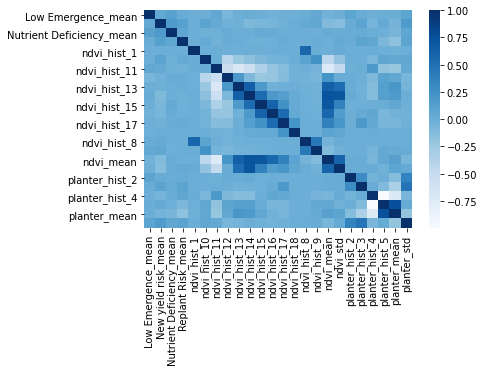

In [50]:
seaborn.heatmap(X_train.corr(),cmap='Blues',annot=False)

In [51]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)
print(mean_squared_error(y_val, y_pred) ** 0.5)

32.860391952387495


In [52]:
min_loss = np.inf
alp = 0
for i in range(1000):
    regr = Ridge(alpha=i/10)
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_val)

    loss = mean_squared_error(y_pred, y_val) ** 0.5
    if loss < min_loss:
        min_loss = loss
        alp = i / 10
        print(f"Minimum loss is {loss} for alpha={i/10}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.43952e-31): result may not be accurate.
  overwrite_a=True).T


Minimum loss is 32.86039194587656 for alpha=0.0
Minimum loss is 32.805319117909875 for alpha=0.1


In [54]:
import torch
from torch import nn

In [55]:
X_train.shape

(8428, 24)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12

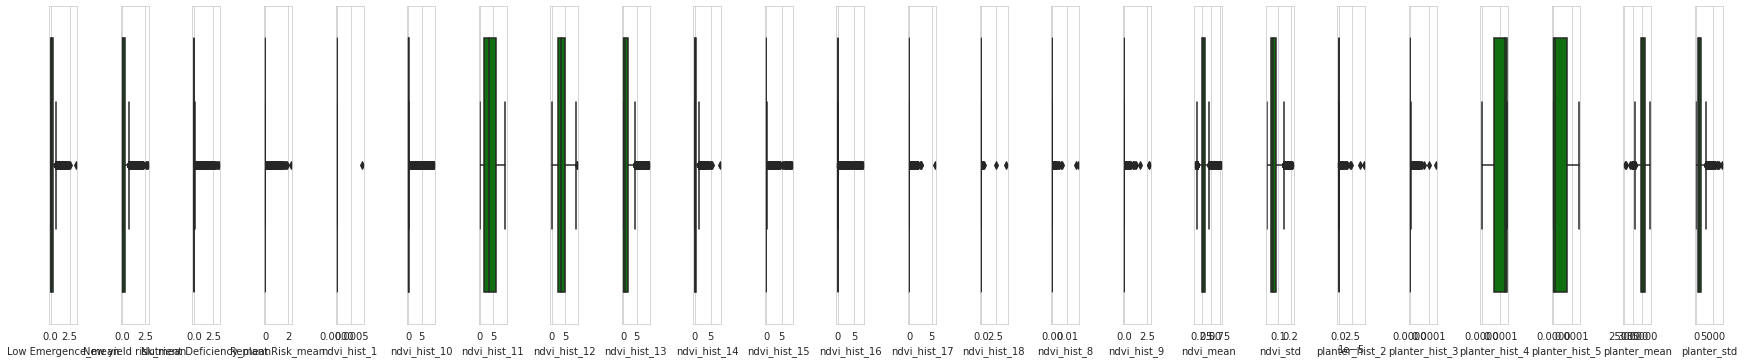

In [60]:
l = X_train.columns.values
number_of_columns = 24
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(X_train[l[i]],color='green',orient='Vertical')
    plt.tight_layout()